In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Opioid Prediction/training_healthcare_opioid_prediction_data.csv')
df.head()

,PatientID,Age,Gender,Race,ZipCode,ChronicPainConditions,NumOpioidPrescriptions,AverageDosage,DurationOfPrescriptions,NumHealthcareVisits,...,Refills,MedicationClass,Adherence,ClinicalNotes,Specialty,AppointmentType,SubSpecialty,TimeofAppointment,TimeSeenbyPhysician,TotalTimeSpentwithPhysician
0,4479647884230,54,Female,Other,73301,Fibromyalgia,6,80,7,18,...,0,Opioid,Moderate,Post-operative pain managed with Hydrocodone.,Orthopedics,Routine Check-up,Specialized,13:39:02,16:33:59,36
1,6354629782347,21,Female,Asian,60601,Cancer Pain,11,70,25,12,...,0,Narcotic,Low,Prescribed Oxymorphone for severe pain.,Pain Management,Consultation,General,19:44:46,17:33:37,51
2,4665077438222,67,Female,White,90210,Fibromyalgia,5,15,7,10,...,2,Analgesic,Moderate,Patient reports effective pain relief with Tap...,Oncology,Routine Check-up,Specialized,18:05:34,04:39:28,46
3,2844761285195,41,Male,White,10001,Fibromyalgia,16,94,19,14,...,0,Analgesic,Low,Using Tramadol for moderate pain management.,Orthopedics,Consultation,Specialized,15:16:11,15:52:51,16
4,4785391177871,36,Male,White,10001,Post-Surgery Pain,7,22,6,9,...,2,Analgesic,High,Patient reports effective pain relief with Tap...,Oncology,Follow-up,General,22:17:05,02:17:33,14


In [2]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_columns)

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical columns:")
print(numerical_columns)

Categorical columns:
Index(['Gender', 'Race', 'ChronicPainConditions', 'PainManagementTreatment',
       'PrescriptionDate', 'MedicationName', 'Dosage', 'Frequency',
       'MedicationClass', 'Adherence', 'ClinicalNotes', 'Specialty',
       'AppointmentType', 'SubSpecialty', 'TimeofAppointment',
       'TimeSeenbyPhysician'],
      dtype='object')
Numerical columns:
Index(['PatientID', 'Age', 'ZipCode', 'NumOpioidPrescriptions',
       'AverageDosage', 'DurationOfPrescriptions', 'NumHealthcareVisits',
       'NumHospitalizations', 'Duration', 'Refills',
       'TotalTimeSpentwithPhysician'],
      dtype='object')


In [9]:
# Get min and max values for numerical columns
numerical_min_max = df[numerical_columns].agg(['min', 'max'])

In [10]:
# Get unique classes for categorical columns
categorical_classes = {col: df[col].unique() for col in categorical_columns}

# Print the results
print("Numerical columns min and max values:")
print(numerical_min_max)
print("\nCategorical columns unique classes:")
print(categorical_classes)

Numerical columns min and max values:
         PatientID  Age  ZipCode  NumOpioidPrescriptions  AverageDosage  \
min    25758856396   18    10001                       1              5   
max  9984733852024   79    90210                      19             99   

     DurationOfPrescriptions  NumHealthcareVisits  NumHospitalizations  \
min                        1                    0                    0   
max                       29                   19                    4   

     Duration  Refills  TotalTimeSpentwithPhysician  
min         1        0                           10  
max        29        4                           59  

Categorical columns unique classes:
{'Gender': array(['Female', 'Male'], dtype=object), 'Race': array(['Other', 'Asian', 'White', 'Black', 'Hispanic'], dtype=object), 'ChronicPainConditions': array(['Fibromyalgia', 'Cancer Pain', 'Post-Surgery Pain',
       'Chronic Back Pain', 'Arthritis'], dtype=object), 'PainManagementTreatment': array(['No', 'Y

In [3]:
# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

# Optionally, you can filter to show only columns with null values
null_values = null_values[null_values > 0]
print("Columns with null values:")
print(null_values)

Null values in each column:
PatientID                      0
Age                            0
Gender                         0
Race                           0
ZipCode                        0
ChronicPainConditions          0
NumOpioidPrescriptions         0
AverageDosage                  0
DurationOfPrescriptions        0
NumHealthcareVisits            0
NumHospitalizations            0
PainManagementTreatment        0
PrescriptionDate               0
MedicationName                 0
Dosage                         0
Frequency                      0
Duration                       0
Refills                        0
MedicationClass                0
Adherence                      0
ClinicalNotes                  0
Specialty                      0
AppointmentType                0
SubSpecialty                   0
TimeofAppointment              0
TimeSeenbyPhysician            0
TotalTimeSpentwithPhysician    0
dtype: int64
Columns with null values:
Series([], dtype: int64)


In [4]:
# Convert columns to datetime
df['TimeofAppointment'] = pd.to_datetime(df['TimeofAppointment'])
df['TimeSeenbyPhysician'] = pd.to_datetime(df['TimeSeenbyPhysician'])
df['PrescriptionDate'] = pd.to_datetime(df['PrescriptionDate'])

# Verify the conversion
print(df[['TimeofAppointment', 'TimeSeenbyPhysician', 'PrescriptionDate']].dtypes)

TimeofAppointment      datetime64[ns]
TimeSeenbyPhysician    datetime64[ns]
PrescriptionDate       datetime64[ns]
dtype: object


C:\Users\Danjin\AppData\Local\Temp\ipykernel_16732\899261025.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeofAppointment'] = pd.to_datetime(df['TimeofAppointment'])
C:\Users\Danjin\AppData\Local\Temp\ipykernel_16732\899261025.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TimeSeenbyPhysician'] = pd.to_datetime(df['TimeSeenbyPhysician'])


In [5]:
# Display data types of all columns
print("Data types of all columns:")
print(df.dtypes)

Data types of all columns:
PatientID                               int64
Age                                     int64
Gender                                 object
Race                                   object
ZipCode                                 int64
ChronicPainConditions                  object
NumOpioidPrescriptions                  int64
AverageDosage                           int64
DurationOfPrescriptions                 int64
NumHealthcareVisits                     int64
NumHospitalizations                     int64
PainManagementTreatment                object
PrescriptionDate               datetime64[ns]
MedicationName                         object
Dosage                                 object
Frequency                              object
Duration                                int64
Refills                                 int64
MedicationClass                        object
Adherence                              object
ClinicalNotes                          object
Special

In [6]:
# Get the number of columns
num_columns = df.shape[1]
print(f"The dataset has {num_columns} columns.")

The dataset has 27 columns.


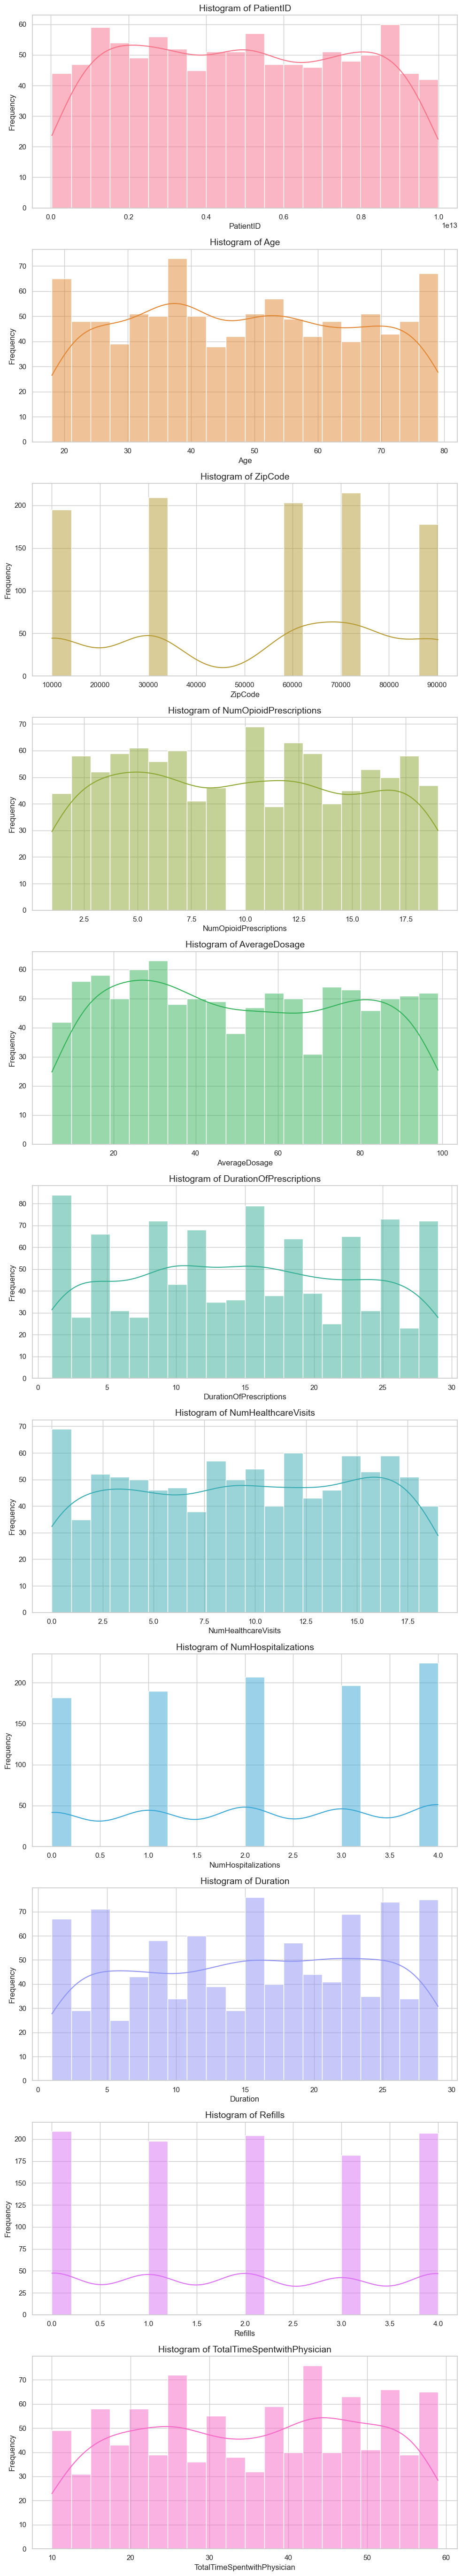

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Set up the color palette and style
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(numerical_columns))

# Plot histograms for all numerical columns
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, len(numerical_columns) * 5))

for ax, col, color in zip(axes, numerical_columns, colors):
    sns.histplot(df[col], bins=20, kde=True, color=color, ax=ax)
    ax.set_title(f'Histogram of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

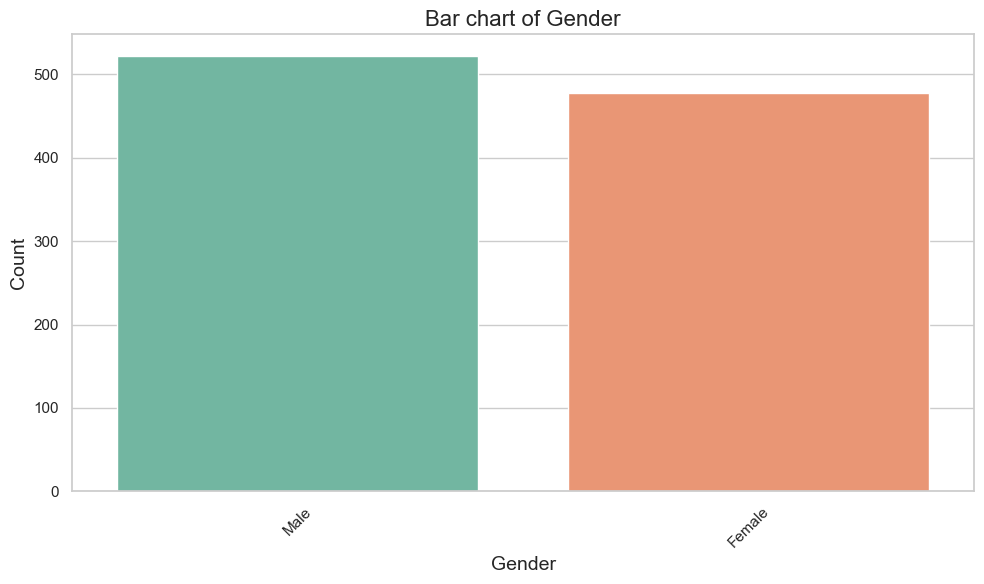

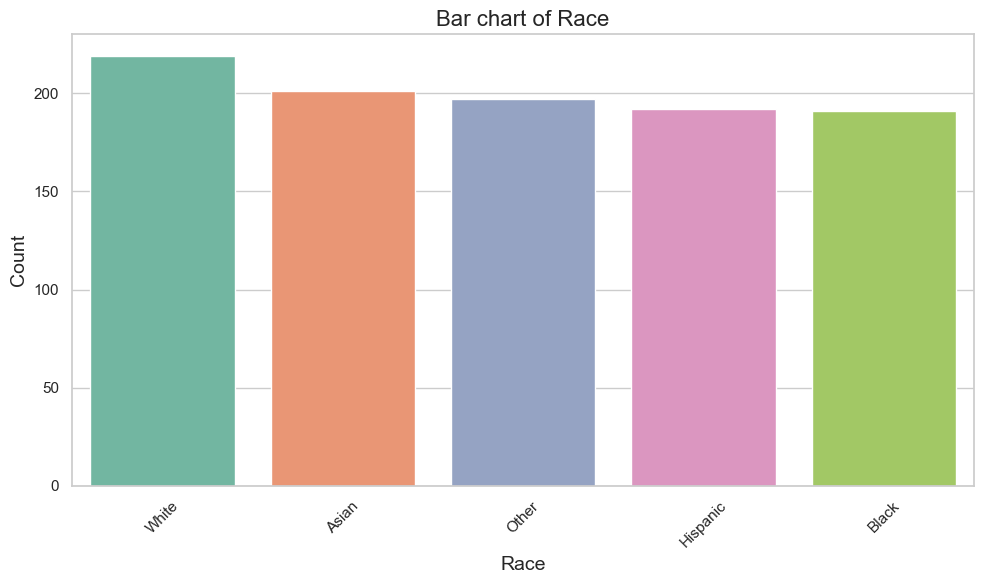

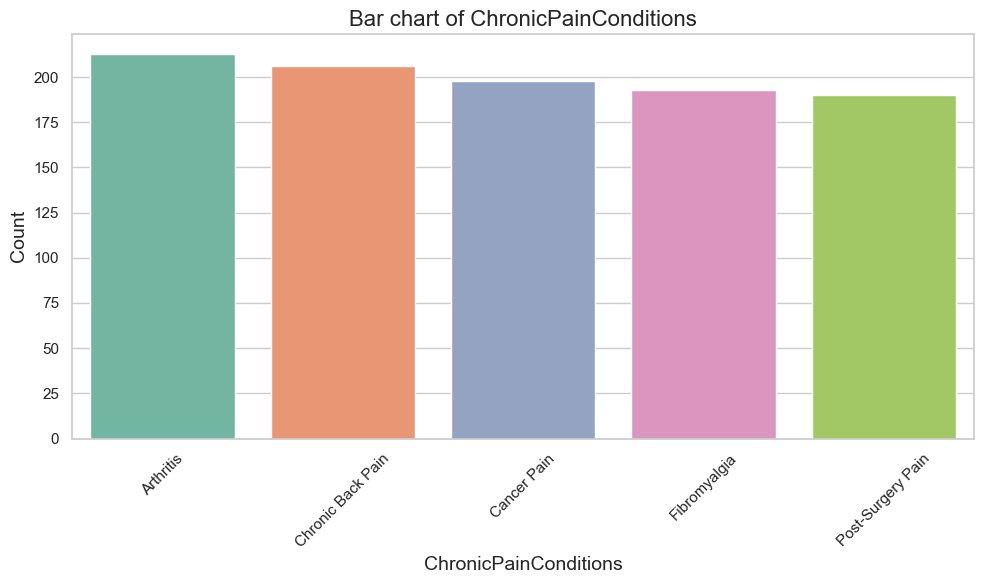

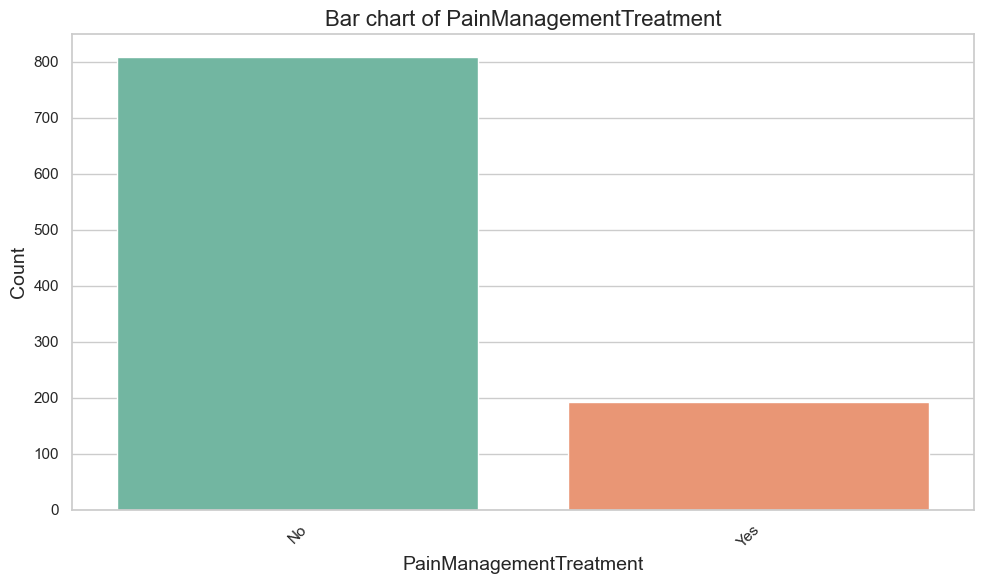

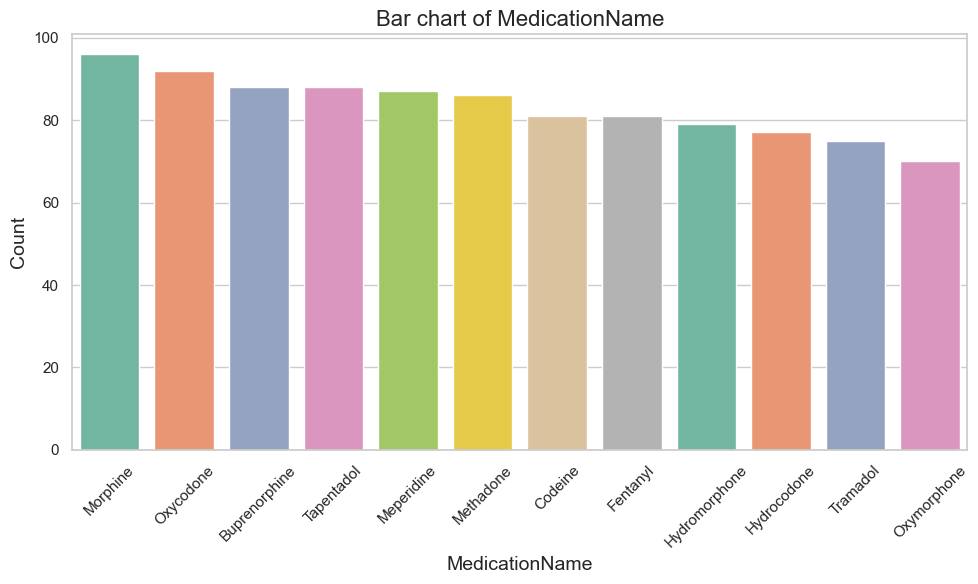

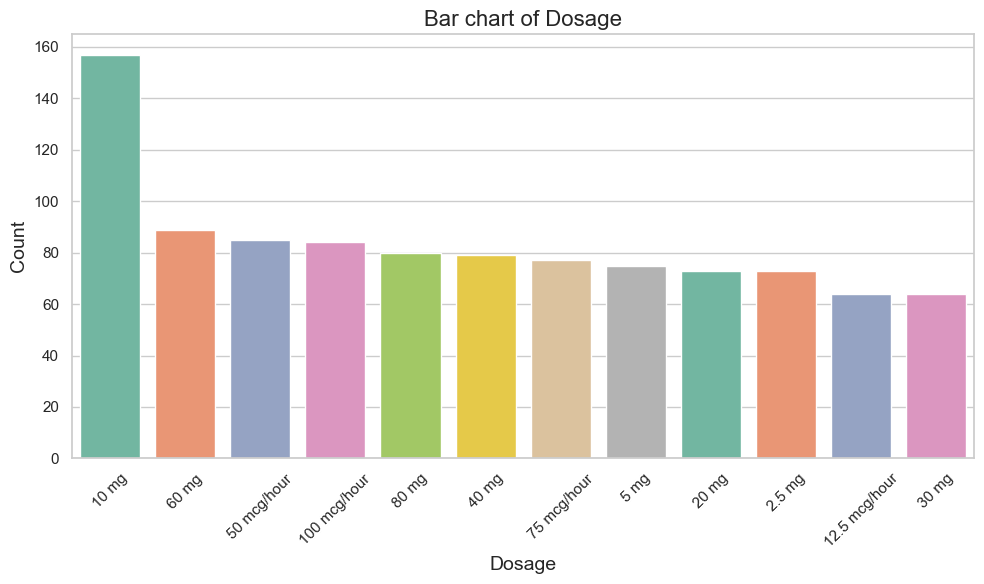

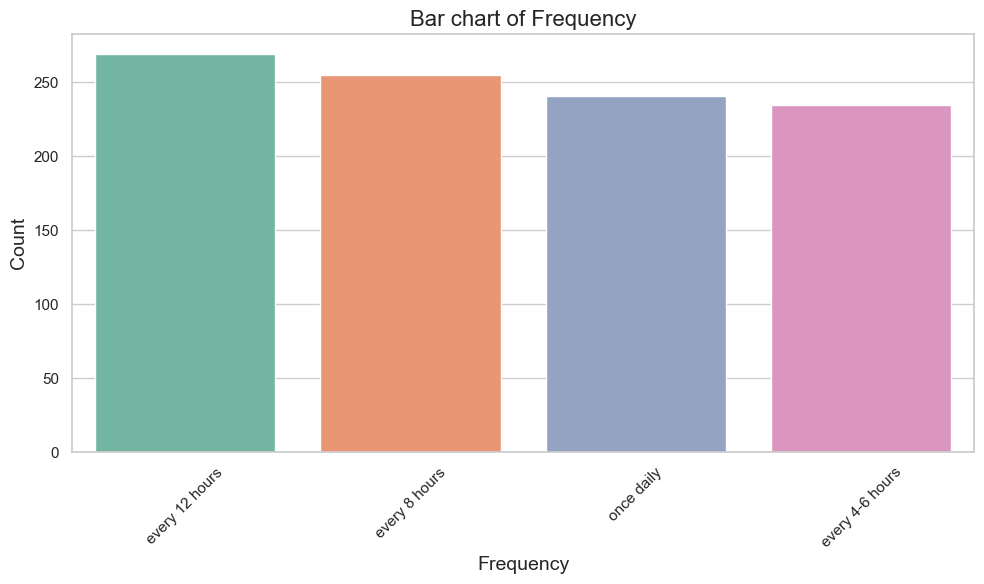

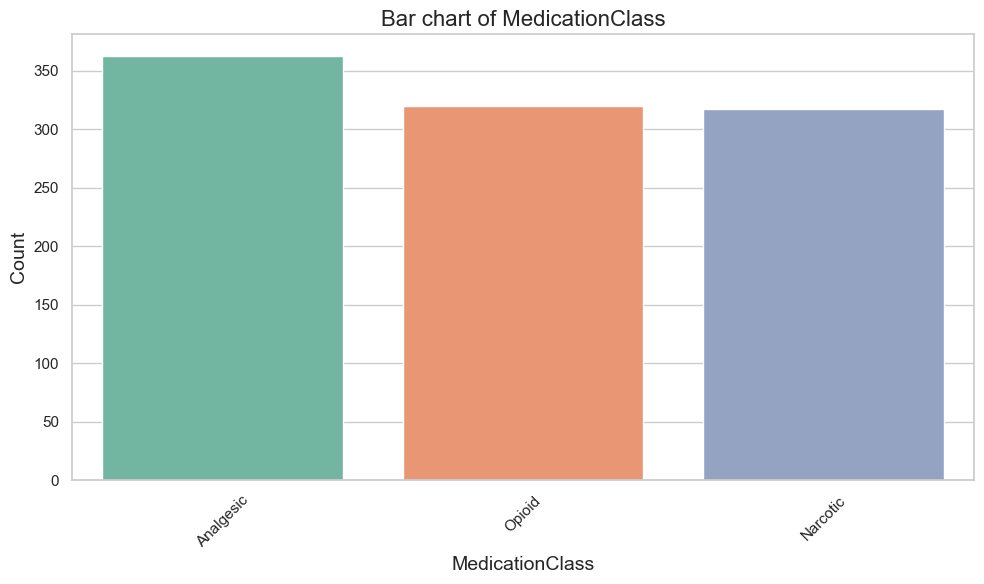

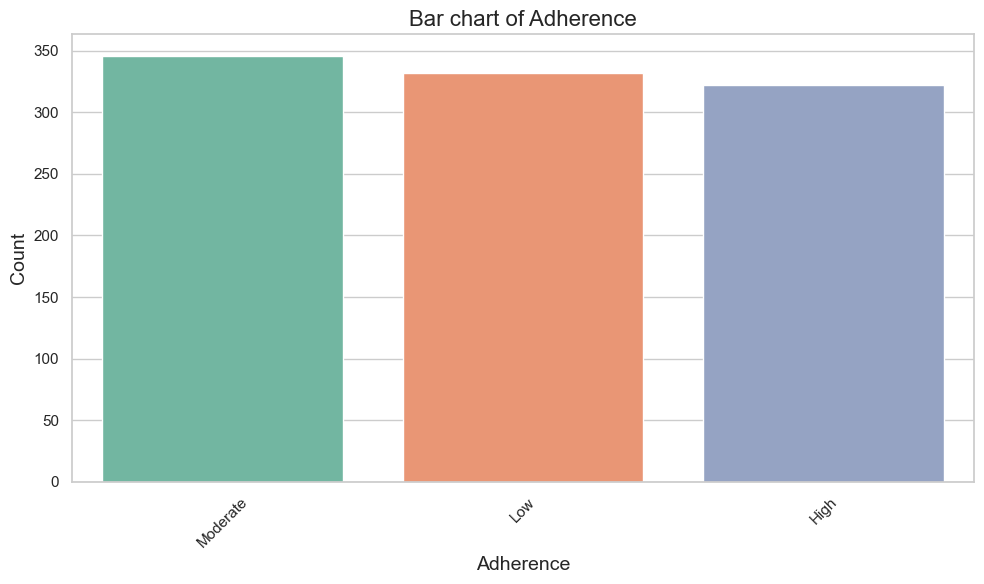

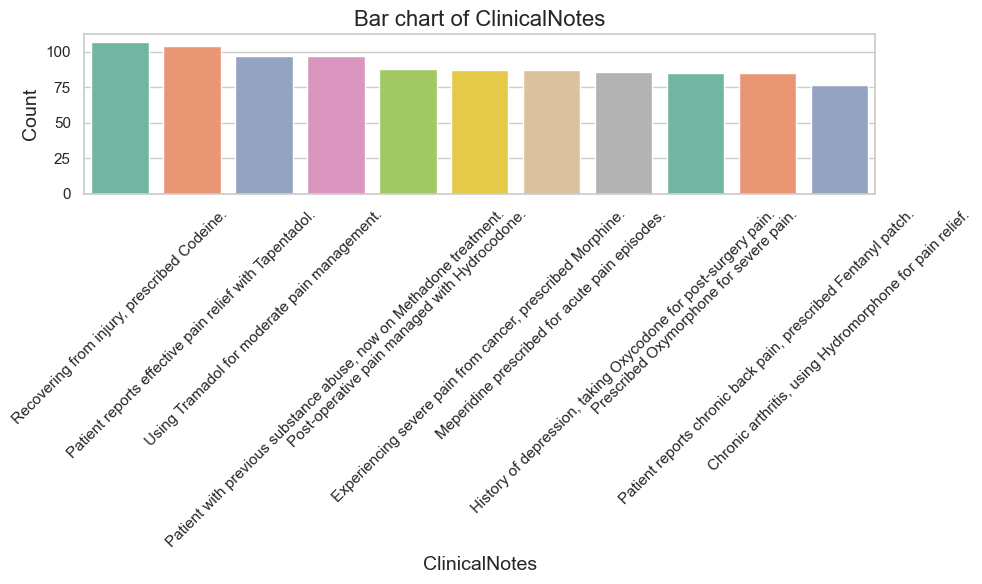

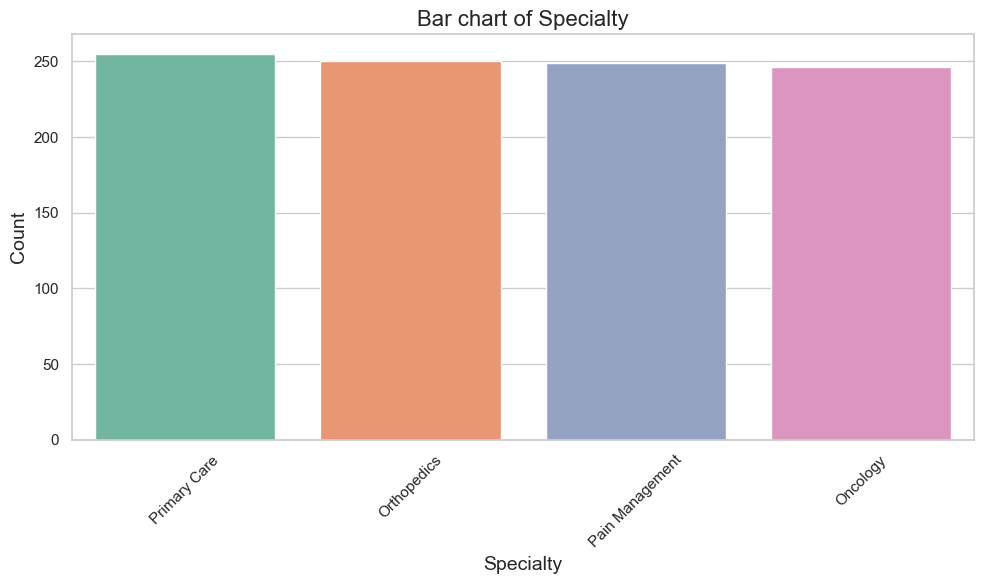

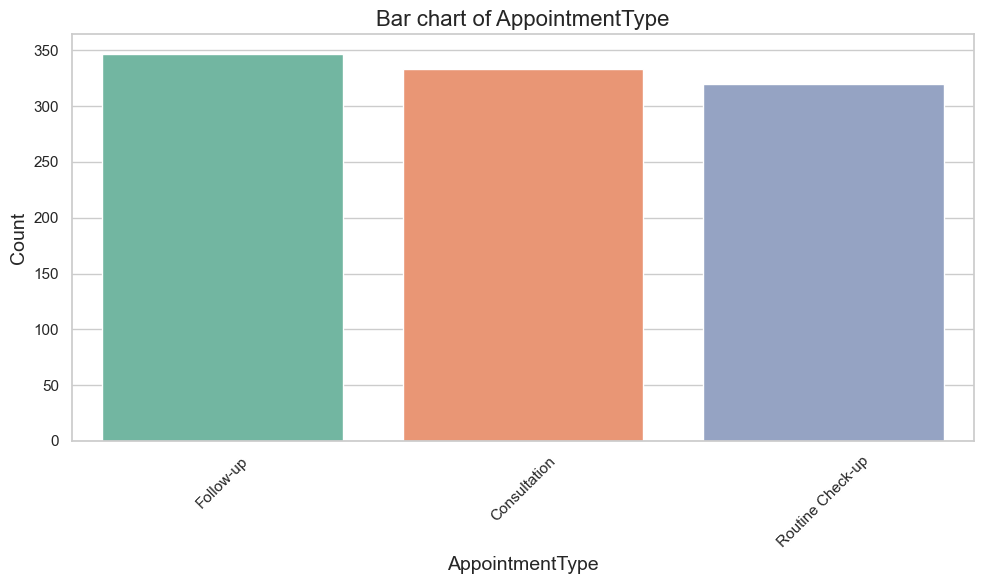

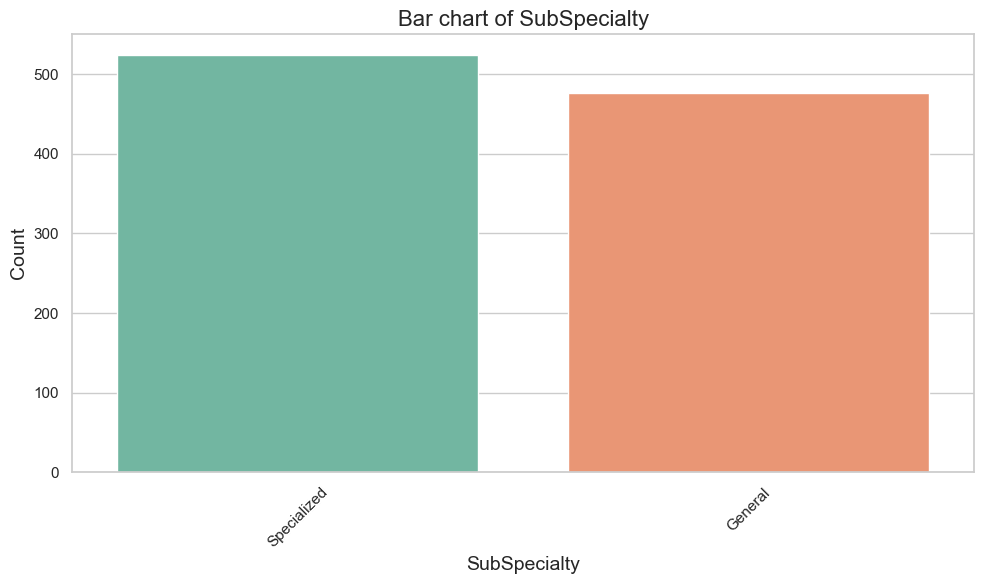

In [8]:

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Set up the color palette
sns.set_palette("Set2")

# Plot bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f'Bar chart of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()